In [1]:
import torch, copy
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('financial_data.csv',encoding='cp949')
scaler = MinMaxScaler()

data_X = data.iloc[:,1:9]
scaler.fit(data_X)
X = scaler.transform(data_X)
data_X = pd.DataFrame(X)


data_Y = data.iloc[:,9].replace(['AAA','AA','A','BBB','BB','B','CCC','CC','C','D'],
                           [0,1,2,3,4,5,6,7,8,9])

a = F.one_hot(torch.tensor(data_Y))
# scaler.fit(data_Y.values.reshape(-1,1))
# Y = scaler.transform(data_Y.values.reshape(-1,1))
data_Y=pd.DataFrame(a)
data = pd.concat([data_X,data_Y],axis=1)
data.shape[0]

928

In [3]:
#feature 수
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 1000

input_dim = data.shape[1]
output_dim = input_dim
hidden_dim = 128
latent_dim = input_dim
lr_g = 0.002
lr_d = 0.0001
#생성시킬 synthetic data의 갯수
num_samples = data.shape[0]
#생성할 synthetic data의 col수
input_columns = data.shape[1]
#synthetic data의 값 범위
input_range = [0,1]


In [4]:
class TensorData(Dataset):
    #전처리를 하는 부분
    def __init__(self, data):
        self.data = torch.FloatTensor(data)
        self.len = self.data.shape[0]
    #특정 1개의 샘플을 가져오는 부분
    def __getitem__(self, index):
        return self.data[index]#, self.y_data[index] 
    
    def __len__(self):
        return self.len

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()


    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)
        self.activation = nn.ReLU()
        self.sig = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.sig(self.fc3(x))
        return x

In [5]:
trainsets = TensorData(data.values)
dataloader = torch.utils.data.DataLoader(trainsets, batch_size=batch_size, shuffle=False, drop_last=False)

BEST 
Epoch: 1 	Best Loss D: 1.7795 	Best Loss G: 0.4883 	Learning rate: 0.0001000000
Epoch [1/1000] Loss D: 1.7795, Loss G: 0.4883
Epoch [2/1000] Loss D: 2.6214, Loss G: 0.5937
Epoch [3/1000] Loss D: 1.0459, Loss G: 1.5027
Epoch [4/1000] Loss D: 1.3325, Loss G: 0.7771
Epoch [5/1000] Loss D: 1.4828, Loss G: 0.6294
Epoch [6/1000] Loss D: 1.2981, Loss G: 0.8841
Epoch [7/1000] Loss D: 1.3516, Loss G: 0.7952
Epoch [8/1000] Loss D: 1.4034, Loss G: 0.7280
Epoch [9/1000] Loss D: 1.4071, Loss G: 0.7149
Epoch [10/1000] Loss D: 1.4008, Loss G: 0.7161
Epoch [11/1000] Loss D: 1.3987, Loss G: 0.7154
Epoch [12/1000] Loss D: 1.3964, Loss G: 0.7139
Epoch [13/1000] Loss D: 1.3891, Loss G: 0.7219
Epoch [14/1000] Loss D: 1.3918, Loss G: 0.7166
Epoch [15/1000] Loss D: 1.3947, Loss G: 0.7097
Epoch [16/1000] Loss D: 1.3931, Loss G: 0.7099
Epoch [17/1000] Loss D: 1.3829, Loss G: 0.7206
Epoch [18/1000] Loss D: 1.3783, Loss G: 0.7252
Epoch [19/1000] Loss D: 1.3820, Loss G: 0.7171
Epoch [20/1000] Loss D: 1.3835

Epoch [173/1000] Loss D: 1.3709, Loss G: 0.6790
Epoch [174/1000] Loss D: 1.3410, Loss G: 0.7108
Epoch [175/1000] Loss D: 1.3168, Loss G: 0.7487
Epoch [176/1000] Loss D: 1.3085, Loss G: 0.7705
Epoch [177/1000] Loss D: 1.3864, Loss G: 0.6864
Epoch [178/1000] Loss D: 1.4155, Loss G: 0.6616
Epoch [179/1000] Loss D: 1.4459, Loss G: 0.6539
Epoch [180/1000] Loss D: 1.3858, Loss G: 0.7104
Epoch [181/1000] Loss D: 1.3440, Loss G: 0.7354
Epoch [182/1000] Loss D: 1.3483, Loss G: 0.7225
Epoch [183/1000] Loss D: 1.4654, Loss G: 0.6180
Epoch [184/1000] Loss D: 1.4078, Loss G: 0.6831
Epoch [185/1000] Loss D: 1.3378, Loss G: 0.7655
Epoch [186/1000] Loss D: 1.3013, Loss G: 0.8000
Epoch [187/1000] Loss D: 1.3484, Loss G: 0.7293
Epoch [188/1000] Loss D: 1.3765, Loss G: 0.6952
Epoch [189/1000] Loss D: 1.3740, Loss G: 0.6876
Epoch [190/1000] Loss D: 1.3837, Loss G: 0.6770
Epoch [191/1000] Loss D: 1.3625, Loss G: 0.6976
Epoch [192/1000] Loss D: 1.3648, Loss G: 0.6943
Epoch [193/1000] Loss D: 1.3559, Loss G:

Epoch [343/1000] Loss D: 1.0418, Loss G: 1.0307
Epoch [344/1000] Loss D: 1.2646, Loss G: 0.7784
Epoch [345/1000] Loss D: 1.5454, Loss G: 0.6029
Epoch [346/1000] Loss D: 1.2826, Loss G: 0.8411
Epoch [347/1000] Loss D: 1.2089, Loss G: 0.8722
Epoch [348/1000] Loss D: 1.1664, Loss G: 0.9228
Epoch [349/1000] Loss D: 1.0596, Loss G: 1.0564
Epoch [350/1000] Loss D: 1.0103, Loss G: 1.0546
Epoch [351/1000] Loss D: 1.1203, Loss G: 0.8898
Epoch [352/1000] Loss D: 1.2789, Loss G: 0.7956
Epoch [353/1000] Loss D: 1.0436, Loss G: 1.1005
Epoch [354/1000] Loss D: 1.0511, Loss G: 0.9910
Epoch [355/1000] Loss D: 0.9803, Loss G: 1.1193
Epoch [356/1000] Loss D: 0.8898, Loss G: 1.2479
Epoch [357/1000] Loss D: 0.8365, Loss G: 1.2855
Epoch [358/1000] Loss D: 0.8132, Loss G: 1.2893
Epoch [359/1000] Loss D: 0.8419, Loss G: 1.1856
Epoch [360/1000] Loss D: 1.9262, Loss G: 0.3094
Epoch [361/1000] Loss D: 1.6227, Loss G: 0.5201
Epoch [362/1000] Loss D: 1.4176, Loss G: 0.6388
Epoch [363/1000] Loss D: 1.5174, Loss G:

Epoch [515/1000] Loss D: 0.4045, Loss G: 1.9927
Epoch [516/1000] Loss D: 0.3610, Loss G: 2.0625
Epoch [517/1000] Loss D: 0.3644, Loss G: 1.9210
Epoch [518/1000] Loss D: 0.4173, Loss G: 1.7836
Epoch [519/1000] Loss D: 0.5078, Loss G: 1.6411
Epoch [520/1000] Loss D: 0.6308, Loss G: 1.4960
Epoch [521/1000] Loss D: 0.7051, Loss G: 1.4356
Epoch [522/1000] Loss D: 0.7482, Loss G: 1.4411
Epoch [523/1000] Loss D: 0.7790, Loss G: 1.4567
Epoch [524/1000] Loss D: 0.7454, Loss G: 1.5400
Epoch [525/1000] Loss D: 0.7063, Loss G: 1.5828
Epoch [526/1000] Loss D: 0.6675, Loss G: 1.6088
Epoch [527/1000] Loss D: 0.6274, Loss G: 1.6480
Epoch [528/1000] Loss D: 0.6382, Loss G: 1.6209
Epoch [529/1000] Loss D: 0.6747, Loss G: 1.6330
Epoch [530/1000] Loss D: 0.6671, Loss G: 1.6234
Epoch [531/1000] Loss D: 0.6584, Loss G: 1.6398
Epoch [532/1000] Loss D: 0.6519, Loss G: 1.6477
Epoch [533/1000] Loss D: 0.6823, Loss G: 1.5830
Epoch [534/1000] Loss D: 0.7148, Loss G: 1.5600
Epoch [535/1000] Loss D: 0.7014, Loss G:

Epoch [687/1000] Loss D: 0.7134, Loss G: 1.5616
Epoch [688/1000] Loss D: 0.6460, Loss G: 1.7116
Epoch [689/1000] Loss D: 0.5836, Loss G: 1.6900
Epoch [690/1000] Loss D: 0.6420, Loss G: 1.6437
Epoch [691/1000] Loss D: 0.6652, Loss G: 1.6903
Epoch [692/1000] Loss D: 0.6701, Loss G: 1.7079
Epoch [693/1000] Loss D: 0.6545, Loss G: 1.7411
Epoch [694/1000] Loss D: 0.6330, Loss G: 1.7621
Epoch [695/1000] Loss D: 0.6184, Loss G: 1.7540
Epoch [696/1000] Loss D: 0.6088, Loss G: 1.7261
Epoch [697/1000] Loss D: 0.6121, Loss G: 1.6851
Epoch [698/1000] Loss D: 0.6144, Loss G: 1.6587
Epoch [699/1000] Loss D: 0.5965, Loss G: 1.6221
Epoch [700/1000] Loss D: 0.6668, Loss G: 1.4200
Epoch [701/1000] Loss D: 0.6889, Loss G: 1.5232
Epoch [702/1000] Loss D: 0.6561, Loss G: 1.5432
Epoch [703/1000] Loss D: 0.6524, Loss G: 1.5479
Epoch [704/1000] Loss D: 0.6188, Loss G: 1.5950
Epoch [705/1000] Loss D: 0.6168, Loss G: 1.5579
Epoch [706/1000] Loss D: 0.6435, Loss G: 1.5647
Epoch [707/1000] Loss D: 0.6558, Loss G:

Epoch [859/1000] Loss D: 0.6067, Loss G: 1.6975
Epoch [860/1000] Loss D: 0.5744, Loss G: 1.5959
Epoch [861/1000] Loss D: 0.5981, Loss G: 1.5599
Epoch [862/1000] Loss D: 0.5894, Loss G: 1.5526
Epoch [863/1000] Loss D: 0.6123, Loss G: 1.5218
Epoch [864/1000] Loss D: 0.6679, Loss G: 1.4945
Epoch [865/1000] Loss D: 0.6949, Loss G: 1.5489
Epoch [866/1000] Loss D: 0.6720, Loss G: 1.5798
Epoch [867/1000] Loss D: 0.6535, Loss G: 1.5817
Epoch [868/1000] Loss D: 0.6016, Loss G: 1.6769
Epoch [869/1000] Loss D: 0.5424, Loss G: 1.7106
Epoch [870/1000] Loss D: 0.5335, Loss G: 1.6682
Epoch [871/1000] Loss D: 0.6207, Loss G: 1.5411
Epoch [872/1000] Loss D: 0.6999, Loss G: 1.5925
Epoch [873/1000] Loss D: 0.7127, Loss G: 1.5874
Epoch [874/1000] Loss D: 0.7073, Loss G: 1.6067
Epoch [875/1000] Loss D: 0.6893, Loss G: 1.6609
Epoch [876/1000] Loss D: 0.6226, Loss G: 1.7352
Epoch [877/1000] Loss D: 0.6142, Loss G: 1.7261
Epoch [878/1000] Loss D: 0.4938, Loss G: 2.0270
Epoch [879/1000] Loss D: 0.3283, Loss G:

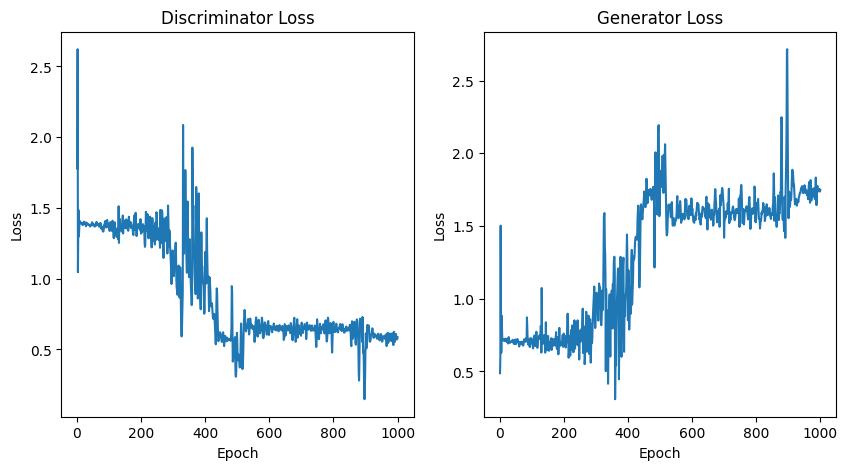

In [6]:
generator = Generator(input_dim, output_dim, hidden_dim).to(device)
discriminator = Discriminator(input_dim, hidden_dim).to(device)
criterion_D = nn.BCELoss().to(device)
criterion_G = nn.BCELoss().to(device)

optimizer_g = optim.Adam(generator.parameters(), lr=lr_g)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr_d)

loss_d_list = []
loss_g_list = []
best_loss_g = 0
best_loss_d = 0

for epoch in range(num_epochs):
    generator.train()
    loss_d_sum = 0
    loss_g_sum = 0
    for i, real_samples in enumerate(dataloader):
        #진짜, 가짜 레이블 생성
        y_real = torch.ones((batch_size, 1)).to(device)
        y_fake = torch.zeros((batch_size, 1)).to(device)

        #진짜 데이터 만들기
        optimizer_d.zero_grad()
        real_samples = real_samples.to(device)

        #discriminator(판별자)가 진짜 데이터를 진짜로 인식하는 오차 계산
        d_real = discriminator(real_samples)
        loss_d_real = criterion_D(d_real, y_real)
        loss_d_real.backward()

        # 랜덤 Tensor로 generator를 통해 fake data 생성
#         z = torch.randn(batch_size, latent_dim).to(device)
        z = torch.tensor(np.random.uniform(low=input_range[0], high=input_range[1], size=(batch_size, latent_dim)),
                     dtype=torch.float32).to(device)
        fake_samples = generator(z)
        #discriminator(판별자)가 가짜 데이터를 가짜로 인식하는 오차 계산
        d_fake = discriminator(fake_samples)
        loss_d_fake = criterion_D(d_fake, y_fake)
        loss_d_fake.backward()


        #real과 fake data를 갖고 낸 오차를 더해서 discriminator의 오차를 계산을 하고 학습함
        loss_d = loss_d_real + loss_d_fake
        optimizer_d.step()


        # Train the generator
        optimizer_g.zero_grad()
#         z = torch.randn(batch_size, latent_dim).to(device)
        z = torch.tensor(np.random.uniform(low=input_range[0], high=input_range[1], size=(batch_size, latent_dim)),
                     dtype=torch.float32).to(device)
        fake_samples = generator(z)
        #생성한 가짜 데이터로 discriminator를 학습
        d_fake = discriminator(fake_samples)
        loss_g = criterion_G(d_fake, y_real)
        loss_g.backward()
        optimizer_g.step()
        
        #한 batch에 발생한 loss 더하기
        loss_d_sum += loss_d.item()
        loss_g_sum += loss_g.item()
            
    loss_d_sum/=len(dataloader)
    loss_g_sum/=len(dataloader)
    #한 에포크마다 발생하는 Loss의 평균 계산
    loss_d_list.append(loss_d_sum)
    loss_g_list.append(loss_g_sum)
    
    # 가장 loss가 적은 모델 저장
    if epoch == 0 or (loss_d_sum < best_loss_d and loss_g_sum < best_loss_g):
        best_epoch = epoch
        best_loss_d = loss_d_sum
        best_loss_g = loss_g_sum
        best_lr = optimizer_d.param_groups[0]['lr']
        low_loss_G = copy.deepcopy(generator.state_dict())
        print('BEST \nEpoch: {} \tBest Loss D: {:.4f} \tBest Loss G: {:.4f} \tLearning rate: {:.10f}'
        .format(best_epoch+1, best_loss_d, best_loss_g, best_lr))
    
    # Print the losses
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss D: {loss_d_sum:.4f}, Loss G: {loss_g_sum:.4f}")
    Final_low_loss_G = copy.deepcopy(generator.state_dict())
print('BEST \nEpoch: {} \tBest Loss D: {:.4f} \tBest Loss G: {:.4f} \tLearning rate: {:.10f}'
        .format(best_epoch+1, best_loss_d, best_loss_g, best_lr))    
# print("loss_d_list  ",loss_d_list)
# print("loss_g_list  ",loss_g_list)

epoch_list = np.arange(1,num_epochs+1)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epoch_list, loss_d_list)
plt.title('Discriminator Loss')
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epoch_list, loss_g_list)
plt.title('Generator Loss')
plt.show()

In [7]:
generator.load_state_dict(low_loss_G)
generator.eval()
with torch.no_grad():
#     z = torch.randn(batch_size, latent_dim).to(device)
    z = torch.tensor(np.random.uniform(low=input_range[0], high=input_range[1], size=(num_samples, input_columns)),
                     dtype=torch.float32).to(device)
    generated_data = generator(z)
    new_data = generated_data.detach().cpu().numpy()
    df = pd.DataFrame(new_data)

In [176]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.396633,0.979600,0.318245,1.652708,0.021832,1.230390,0.891698,0.425110,0.570042,0.310374,0.631082,-0.261532,0.508797,-0.049907,-0.295892,-0.263163,-0.476511,-0.220990
1,-0.582041,1.236060,0.431003,2.245924,0.027776,1.648887,1.258548,0.701758,0.780533,0.420927,0.958039,-0.309603,0.695668,0.011260,-0.470975,-0.348617,-0.629881,-0.256703
2,-0.457372,1.000445,0.284484,1.695180,0.026360,1.299214,0.974784,0.461521,0.630968,0.344432,0.681499,-0.242555,0.556119,0.019041,-0.333879,-0.230555,-0.495705,-0.219632
3,-0.466877,0.960598,0.296861,1.661146,0.027772,1.249262,0.924698,0.437128,0.592276,0.336262,0.646894,-0.252834,0.538879,-0.002919,-0.274798,-0.239943,-0.475291,-0.245032
4,-0.464505,1.063656,0.335863,1.755293,0.012817,1.336921,1.017504,0.506035,0.652550,0.333761,0.772352,-0.239140,0.559498,-0.030630,-0.376627,-0.252605,-0.483092,-0.213348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,-0.637364,1.311097,0.420292,2.312165,0.132277,1.624075,1.241145,0.675678,0.721907,0.440008,0.953420,-0.359944,0.735798,-0.028407,-0.407895,-0.345821,-0.640969,-0.268290
924,-0.514627,1.088342,0.320041,1.803000,0.023468,1.381908,1.011832,0.529250,0.658398,0.365487,0.800383,-0.241934,0.607453,0.046193,-0.399437,-0.260612,-0.508379,-0.251069
925,-0.501748,1.122547,0.312806,1.862030,0.061852,1.387932,1.021253,0.530252,0.598233,0.349966,0.784694,-0.252611,0.599096,-0.036899,-0.329343,-0.246340,-0.538949,-0.230784
926,-0.455762,0.967917,0.335900,1.710261,-0.035473,1.311104,0.976933,0.500602,0.634541,0.335919,0.737015,-0.237158,0.569479,0.021375,-0.359074,-0.234041,-0.501069,-0.235582


In [177]:
y_data = df.iloc[:,8:].values
print(y_data.argmax(1))
# print(y_data)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 